In [1]:
import pandas as pd

## 와인 데이터 불러오기
red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=";")
white_wine = pd.read_csv(white_url, sep=";")

# 레드/화이트 라벨 컬럼 생성
red_wine['color'] = 1
white_wine['color'] = 0

# 와인 데이터
wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1 if grade>5 else 0 for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train) # 트레인데이터로 학습해라

y_pred_tr = wine_tree.predict(X_train) # 트레인을 토대로 예측하고 다시 트레인데이터 넣으면 얼마나 예측할까?
y_pred_test = wine_tree.predict(X_test) # 트레인을 토대로 예측하고 테스트 데이터를 넣으면 얼마나 예측할까?

print('Train Acc : ', accuracy_score(y_train, y_pred_tr)) # 트레인을 토대로 예측하고 다시 트레인데이터 넣은 예측
print('Test Acc : ',accuracy_score(y_test, y_pred_test)) # 트레인을 토대로 예측하고 테스트 데이터 넣은 예측

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [3]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

print('Accuracy : ', accuracy_score(y_test, y_pred_test))
print('Recall : ', recall_score(y_test, y_pred_test))
print('Precision : ', precision_score(y_test, y_pred_test))
print('AUC score : ', roc_auc_score(y_test, y_pred_test))
print('F1 score : ', f1_score(y_test, y_pred_test))

Accuracy :  0.7161538461538461
Recall :  0.7314702308626975
Precision :  0.8026666666666666
AUC score :  0.7105988470875331
F1 score :  0.7654164017800381


In [5]:
#  분류 라벨들의 확률! 
# predict : 0, 1, 2, 인지 결과값 출력
# predict_proba : 각 분류 값들이 0, 1, 2, 인지 의 확률
wine_tree.predict_proba(X_test)[:1]

array([[0.61602594, 0.38397406]])

In [6]:
import matplotlib.pyplot as plt

pred_prob = wine_tree.predict_proba(X_test)[:, 1] # 1일 확률만
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

In [8]:
fpr, tpr, thresholds

(array([0.        , 0.14884696, 0.25366876, 0.31027254, 1.        ]),
 array([0.        , 0.45078979, 0.65492102, 0.73147023, 1.        ]),
 array([1.87802198, 0.87802198, 0.72692794, 0.67447307, 0.38397406]))

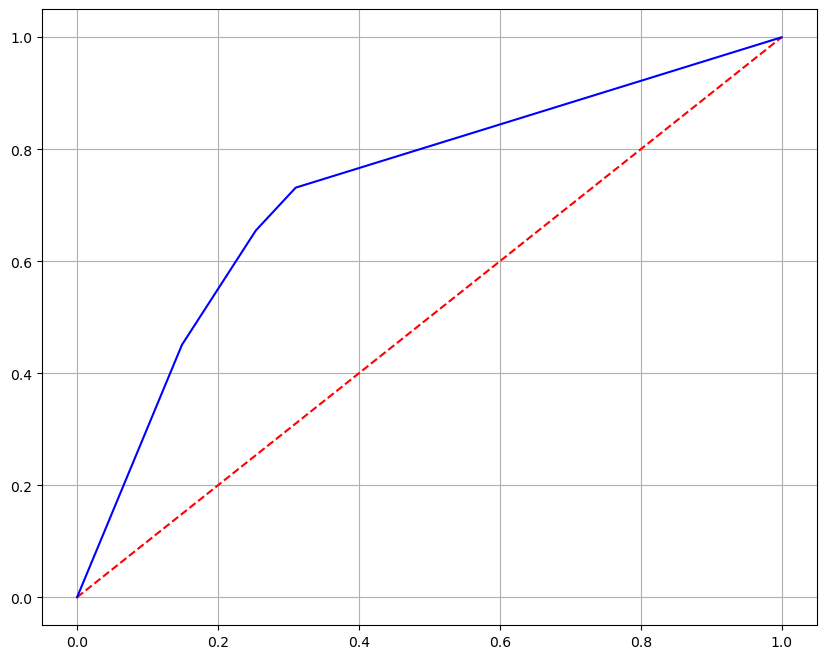

In [14]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1], 'r', ls='dashed')
plt.plot(fpr, tpr, 'b')
plt.grid()
plt.show()